# IAA Laboratori 5 - Classification

# Logistic Regression, K-Nearest Neighbours, Support Vector Machines and Decision Trees

In [1]:
%pip install pydotplus

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Loading libraries

# Basic libraries 
import pandas as pd
import numpy as np
from numpy.linalg import inv
from scipy import stats

# Data Visualization
import plotly.express as px
import plotly.graph_objs as go
import plotly.subplots as sp
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import plotly.io as pio
from IPython.display import display
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
import matplotlib.pyplot as plt
from mlxtend.plotting import scatterplotmatrix
import seaborn as sns
%matplotlib inline

# Diabetes dataset
from sklearn.datasets import load_diabetes

# For splitting the dataset into training and testing sets
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

# For loading discriminant models
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
 
# Metric for evaluation
from sklearn.metrics import mean_squared_error
from sklearn.metrics import  ConfusionMatrixDisplay,\
                  classification_report,  RocCurveDisplay, PrecisionRecallDisplay,\
                    accuracy_score, f1_score, precision_score, recall_score

# Statsmodels for Linear Regression
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Display images and HTML datatables
from IPython.display import Image
from IPython.display import display, HTML
show_html = lambda html: display(HTML(html))

# Hiding warnings 
import warnings
warnings.filterwarnings("ignore")

In [3]:
from IPython.display import Image
%matplotlib inline

In [4]:
def save_results(clf, X_test, y_test, nclf, df):
    df.loc[nclf,'test acc'] = accuracy_score(y_test, clf.predict(X_test))
    df.loc[nclf,'precision score (W)'] = precision_score(y_test, clf.predict(X_test), average='weighted')
    df.loc[nclf,'recall score (W)'] = recall_score(y_test, clf.predict(X_test), average='weighted')
    df.loc[nclf,'f1 score (W)'] = f1_score(y_test, clf.predict(X_test), average='weighted')
    return df

results_df = pd.DataFrame()

niter = 15
cv = 5

In [5]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

# To check recent matplotlib compatibility
import matplotlib
from distutils.version import LooseVersion
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ['red', 'blue', 'lightgreen', 'gray', 'cyan']
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    color=cmap(idx),
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]

        
        if LooseVersion(matplotlib.__version__) < LooseVersion('0.3.4'):
            plt.scatter(X_test[:, 0],
                        X_test[:, 1],
                        c='',
                        edgecolor='black',
                        alpha=1.0,
                        linewidth=1,
                        marker='o',
                        s=100, 
                        label='test set')
        else:
            plt.scatter(X_test[:, 0],
                        X_test[:, 1],
                        c='none',
                        edgecolor='black',
                        alpha=1.0,
                        linewidth=1,
                        marker='o',
                        s=100, 
                        label='test set')        

# The Iris dataset

Loading the Iris dataset from scikit-learn. Here, the third column represents the petal length, and the fourth column the petal width of the flower examples. The classes are already converted to integer labels where 0=Iris-Setosa, 1=Iris-Versicolor, 2=Iris-Virginica.

![](https://upload.wikimedia.org/wikipedia/commons/7/7a/Mature_flower_diagram-es.svg)

In [6]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
col_names = [iris.feature_names[0],iris.feature_names[1]]
X = pd.DataFrame(iris.data[:, [0,1]], columns=col_names)
y = iris.target

print('Class labels:', np.unique(y))
X.columns

Class labels: [0 1 2]


Index(['sepal length (cm)', 'sepal width (cm)'], dtype='object')

Splitting data into 70% training and 30% test data:

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

In [8]:
print('Labels count in y:', np.bincount(y))
print('Labels count in y_train:', np.bincount(y_train))
print('Labels count in y_test:', np.bincount(y_test))

Labels count in y: [50 50 50]
Labels count in y_train: [35 35 35]
Labels count in y_test: [15 15 15]


In [9]:
#fig, axes = plt.subplots(10,3,figsize=(15,30))

X_train_frame = pd.DataFrame(X_train)
#X_train_frame.columns=X.columns
X_train.shape

(105, 2)

Visualizing the feature distribution:

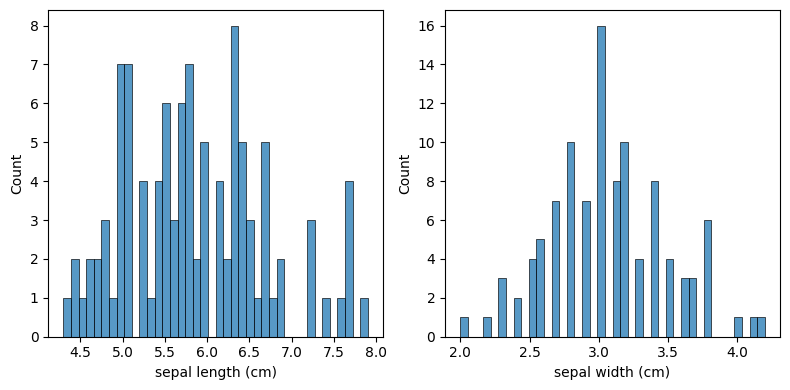

In [10]:
fig, axes = plt.subplots(1,2,figsize=(8,4))

X_train_frame = pd.DataFrame(X_train)
X_train_frame.columns=X.columns
for i, c in enumerate(X.columns):
    ax = axes.reshape(-1)[i]
    if X_train_frame[c].dtype.kind == 'O':
        a = sns.countplot(x=c,data=X_train_frame,ax=ax)
    else:
        b = sns.histplot(x=c,data=X_train_frame,ax=ax,bins=40)
plt.tight_layout()

Standardizing the features:

In [11]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

# Training a simple perceptron

In [12]:
from sklearn.linear_model import Perceptron

ppn = Perceptron(eta0=0.1, random_state=1)
ppn.fit(X_train_std, y_train)

Perceptron(eta0=0.1, random_state=1)

In [13]:
y_pred = ppn.predict(X_test_std)
print('Misclassified examples: %d' % (y_test != y_pred).sum())

Misclassified examples: 14


In [14]:
from sklearn.metrics import accuracy_score

print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Accuracy: 0.689


In [15]:
print('Accuracy: %.3f' % ppn.score(X_test_std, y_test))

Accuracy: 0.689


Training a perceptron model using the standardized training data:

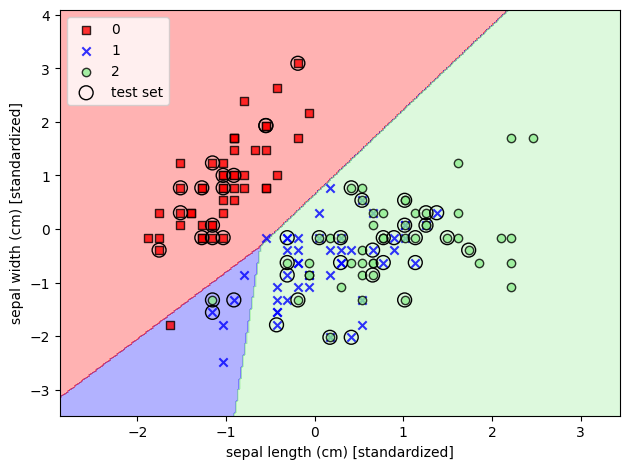

In [16]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X=X_combined_std, y=y_combined,
                      classifier=ppn, test_idx=range(105, 150))
plt.xlabel(col_names[0] + ' [standardized]')
plt.ylabel(col_names[1] + ' [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

In [17]:
print('Accuracy: %.3f' % ppn.score(X_train_std, y_train))

Accuracy: 0.686


In [18]:
print('Accuracy: %.3f' % ppn.score(X_test_std, y_test))

Accuracy: 0.689


In [19]:
print('Accuracy: %.3f' % ppn.score(X_combined_std, y_combined))

Accuracy: 0.687


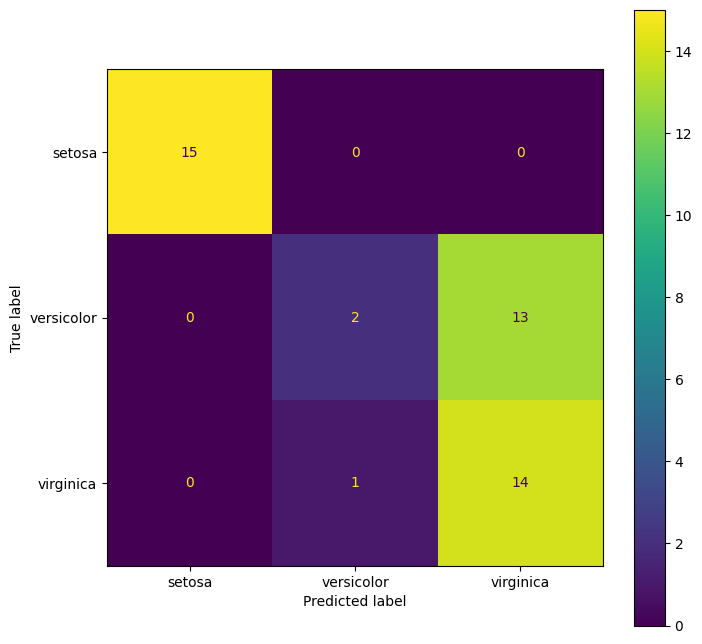

In [20]:
 plt.figure(figsize=(8,8));
ConfusionMatrixDisplay.from_estimator(ppn, X_test_std,y_test, display_labels=iris.target_names, ax=plt.subplot());

In [21]:
print(classification_report(ppn.predict(X_test_std), y_test, target_names=iris.target_names))
results_df = save_results(ppn, X_test_std, y_test, 'Perceptron', results_df)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.13      0.67      0.22         3
   virginica       0.93      0.52      0.67        27

    accuracy                           0.69        45
   macro avg       0.69      0.73      0.63        45
weighted avg       0.90      0.69      0.75        45



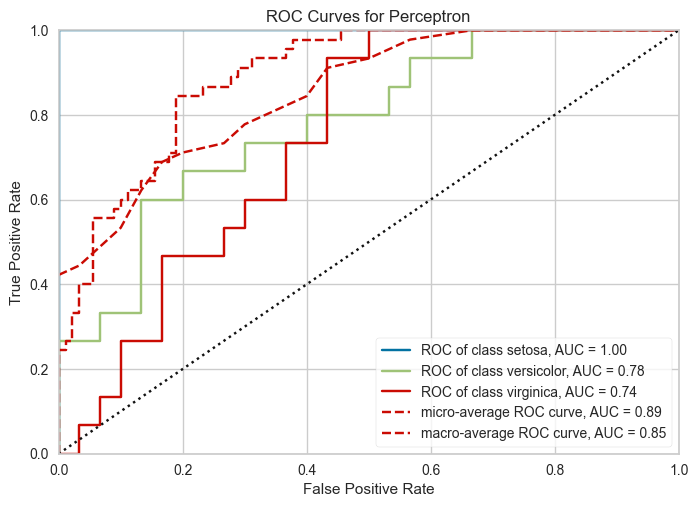

In [22]:
from yellowbrick.classifier.rocauc import roc_auc
roc_auc(ppn, X_test_std,y_test, classes=iris.target_names, ax=plt.subplot());

In [23]:
results_df

,test acc,precision score (W),recall score (W),f1 score (W)
Perceptron,0.688889,0.728395,0.688889,0.62963


# Logistic regression

Directly estimates $p(y=C_k|X=x)$ with no assumption on the class features. The estimate corresponds to the odd ratio between classes. They are converted to probabilities through the sigmoid function as follows:

$\quad \quad \quad  \quad \quad p(C|X) = \sigma(w\cdot x)$ 

We can apply regularization in scikit-learn by using L1 o L2 penalties. 

### Logistic regression intuition and conditional probabilities

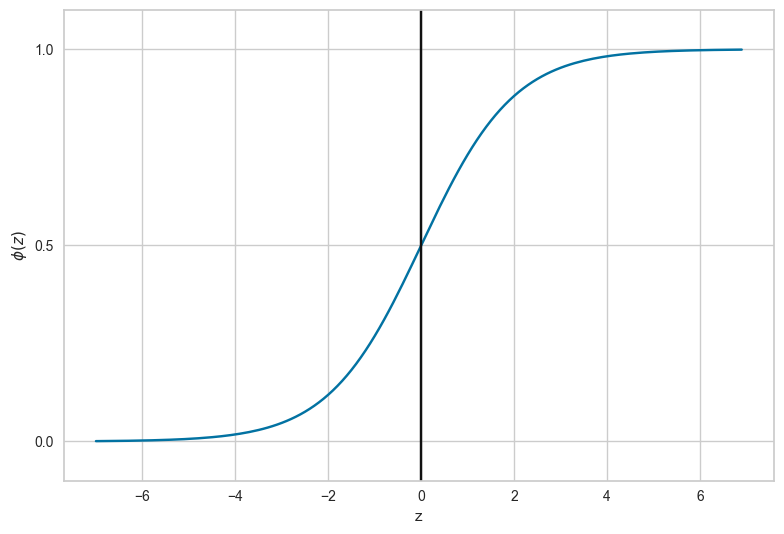

In [24]:
import matplotlib.pyplot as plt
import numpy as np

def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

z = np.arange(-7, 7, 0.1)
phi_z = sigmoid(z)

plt.plot(z, phi_z)
plt.axvline(0.0, color='k')
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\phi (z)$')

# y axis ticks and gridline
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)

plt.tight_layout()
plt.show()

### Learning the weights of the logistic cost function

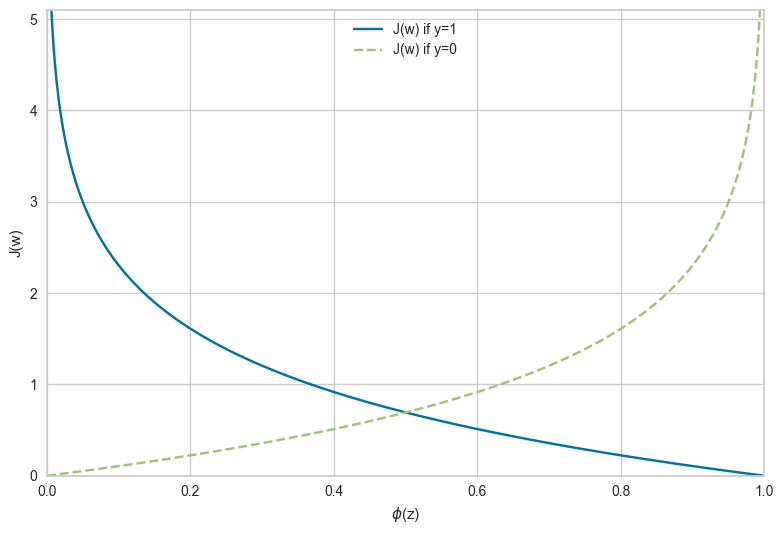

In [25]:
def cost_1(z):
    return - np.log(sigmoid(z))


def cost_0(z):
    return - np.log(1 - sigmoid(z))

z = np.arange(-10, 10, 0.1)
phi_z = sigmoid(z)

c1 = [cost_1(x) for x in z]
plt.plot(phi_z, c1, label='J(w) if y=1')

c0 = [cost_0(x) for x in z]
plt.plot(phi_z, c0, linestyle='--', label='J(w) if y=0')

plt.ylim(0.0, 5.1)
plt.xlim([0, 1])
plt.xlabel('$\phi$(z)')
plt.ylabel('J(w)')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [26]:
class LogisticRegressionGD(object):
    """Logistic Regression Classifier using gradient descent.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.


    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    cost_ : list
      Logistic cost function value in each epoch.

    """
    def __init__(self, eta=0.05, n_iter=100, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            
            # note that we compute the logistic `cost` now
            # instead of the sum of squared errors cost
            cost = -y.dot(np.log(output)) - ((1 - y).dot(np.log(1 - output)))
            self.cost_.append(cost)
        return self
    
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, z):
        """Compute logistic sigmoid activation"""
        return 1. / (1. + np.exp(-np.clip(z, -250, 250)))

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, 0)
        # equivalent to:
        # return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)

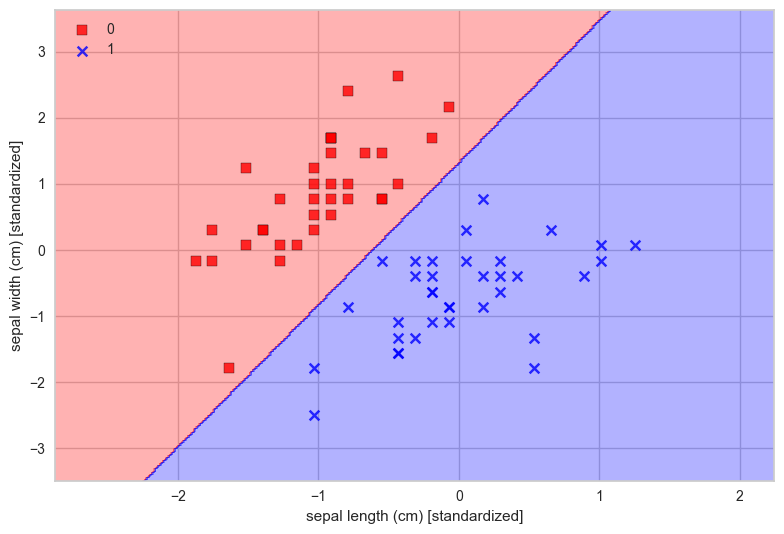

In [27]:
X_train_01_subset = X_train_std[(y_train == 0) | (y_train == 1)]
y_train_01_subset = y_train[(y_train == 0) | (y_train == 1)]

lrgd = LogisticRegressionGD(eta=0.05, n_iter=1000, random_state=1)
lrgd.fit(X_train_01_subset,
         y_train_01_subset)

plot_decision_regions(X=X_train_01_subset, 
                      y=y_train_01_subset,
                      classifier=lrgd)

plt.xlabel(col_names[0] + ' [standardized]')
plt.ylabel( col_names[1] + ' [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

### Training a logistic regression model with scikit-learn

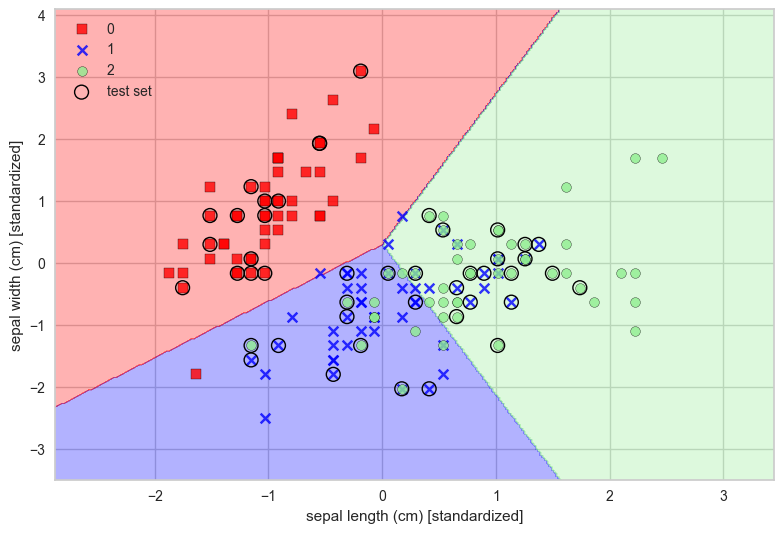

In [28]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=1.0, random_state=1, solver='lbfgs', multi_class='ovr')
lr.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined,
                      classifier=lr, test_idx=range(105, 150))
plt.xlabel(col_names[0] + ' [standardized]')
plt.ylabel(col_names[1] + ' [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [29]:
print(classification_report(lr.predict(X_test_std), y_test, target_names=iris.target_names))
results_df = save_results(lr, X_test_std, y_test, 'Logistic Regression', results_df)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.53      0.67      0.59        12
   virginica       0.73      0.61      0.67        18

    accuracy                           0.76        45
   macro avg       0.76      0.76      0.75        45
weighted avg       0.77      0.76      0.76        45



In [30]:
print(np.mean(cross_val_score(lr,X_train_std,y_train,cv=10)))

0.8190909090909091


In [31]:
lr.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'ovr',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 1,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [32]:
results_df

,test acc,precision score (W),recall score (W),f1 score (W)
Perceptron,0.688889,0.728395,0.688889,0.629630
Logistic Regression,0.755556,0.759259,0.755556,0.753086


<div class="alert alert-success">
PLAYTIME: Fill the code in the GridSearch call to make a hyperparameter grid search with cross-validation for parameter C of the logistic regression model. Choose other parameter to perform a search.
</div>

In [33]:
param = {'penalty':['l2']} ### HERE COMPLETE THIS LINE ###
lr_gs =  GridSearchCV(lr,param,cv=10, n_jobs=-1, refit=True)
lr_gs.fit(X_train_std, y_train);

GridSearchCV(cv=10,
             estimator=LogisticRegression(multi_class='ovr', random_state=1),
             n_jobs=-1,
             param_grid={'C': array([   1.        ,    1.41253754,    1.99526231,    2.81838293,
          3.98107171,    5.62341325,    7.94328235,   11.22018454,
         15.84893192,   22.38721139,   31.6227766 ,   44.66835922,
         63.09573445,   89.12509381,  125.89254118,  177.827941  ,
        251.18864315,  354.81338923,  501.18723363,  707.94578438,
       1000.        ]),
                         'penalty': ['l2', 'elasticnet']})

In [34]:
show_html(pd.DataFrame(lr_gs.cv_results_).loc[:,['params', 'mean_test_score','rank_test_score']].sort_values(by='rank_test_score').head().to_html())

,params,mean_test_score,rank_test_score
38,"{'C': 707.945784384138, 'penalty': 'l2'}",0.829091,1
36,"{'C': 501.18723362727195, 'penalty': 'l2'}",0.829091,1
34,"{'C': 354.8133892335753, 'penalty': 'l2'}",0.829091,1
32,"{'C': 251.18864315095797, 'penalty': 'l2'}",0.829091,1
30,"{'C': 177.82794100389228, 'penalty': 'l2'}",0.829091,1


In [35]:
print(classification_report(lr_gs.predict(X_test_std), y_test, target_names=iris.target_names))
results_df = save_results(lr_gs, X_test_std, y_test, 'Logistic Regression GridSearch', results_df)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.53      0.67      0.59        12
   virginica       0.73      0.61      0.67        18

    accuracy                           0.76        45
   macro avg       0.76      0.76      0.75        45
weighted avg       0.77      0.76      0.76        45



In [36]:
results_df

,test acc,precision score (W),recall score (W),f1 score (W)
Perceptron,0.688889,0.728395,0.688889,0.629630
Logistic Regression,0.755556,0.759259,0.755556,0.753086
Logistic Regression GridSearch,0.755556,0.759259,0.755556,0.753086


In [37]:
lr.predict_proba(X_test_std[:3, :])

array([[0.24350562, 0.18850695, 0.56798743],
       [0.92730859, 0.03168074, 0.04101068],
       [0.86806329, 0.12608253, 0.00585418]])

In [38]:
lr.predict_proba(X_test_std[:3, :]).sum(axis=1)

array([1., 1., 1.])

In [39]:
lr.predict_proba(X_test_std[:3, :]).argmax(axis=1)

array([2, 0, 0])

In [40]:
lr.predict(X_test_std[:3, :])

array([2, 0, 0])

In [41]:
lr.predict(X_test_std[0, :].reshape(1, -1))

array([2])

In [ ]:
help(LogisticRegression)

### Tackling overfitting via regularization

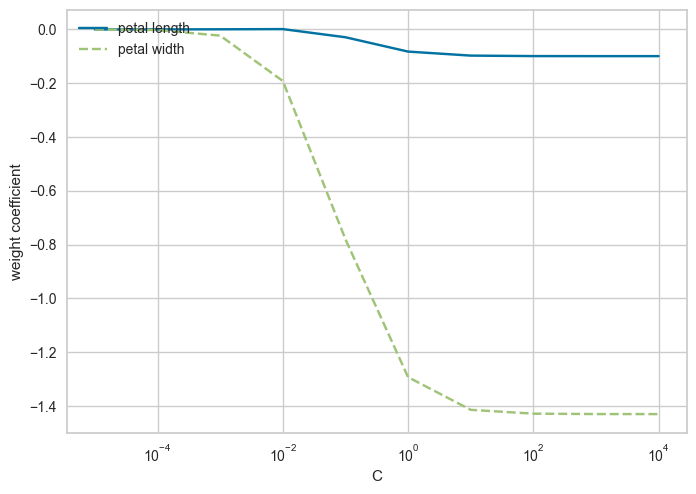

In [43]:
weights, params = [], []
for c in np.arange(-5, 5):
    lr = LogisticRegression(C=10.**c, random_state=1,
                            solver='lbfgs',
                            multi_class='ovr')
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10.**c)

weights = np.array(weights)
plt.plot(params, weights[:, 0],
         label='petal length')
plt.plot(params, weights[:, 1], linestyle='--',
         label='petal width')
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.legend(loc='upper left')
plt.xscale('log')
plt.show()

# Support vector machines

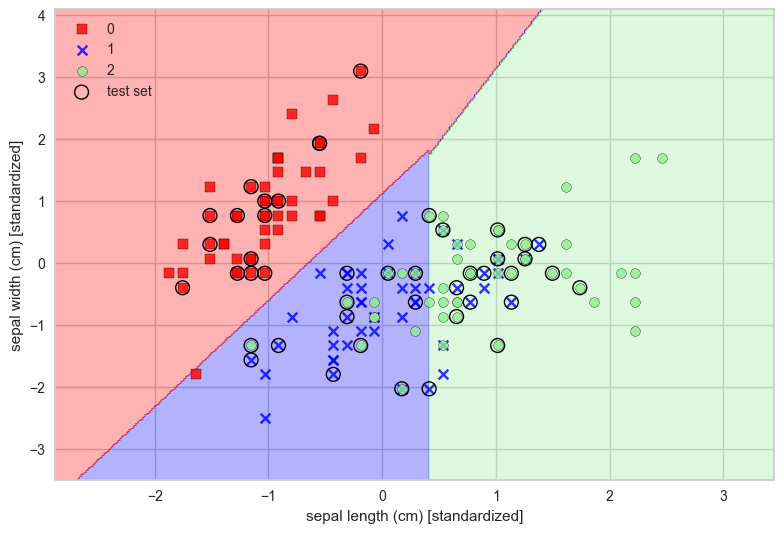

In [44]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', C=1.0, random_state=1)
svm.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, 
                      y_combined,
                      classifier=svm, 
                      test_idx=range(105, 150))
plt.xlabel(col_names[0] + ' [standardized]')
plt.ylabel(col_names[1] + ' [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [45]:
print(classification_report(svm.predict(X_test_std), y_test, target_names=iris.target_names))
results_df = save_results(svm, X_test_std, y_test, 'SVM', results_df)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.53      0.62      0.57        13
   virginica       0.67      0.59      0.62        17

    accuracy                           0.73        45
   macro avg       0.73      0.73      0.73        45
weighted avg       0.74      0.73      0.73        45



In [46]:
results_df

,test acc,precision score (W),recall score (W),f1 score (W)
Perceptron,0.688889,0.728395,0.688889,0.629630
Logistic Regression,0.755556,0.759259,0.755556,0.753086
Logistic Regression GridSearch,0.755556,0.759259,0.755556,0.753086
SVM,0.733333,0.734540,0.733333,0.732143


## Solving non-linear problems using a kernel SVM

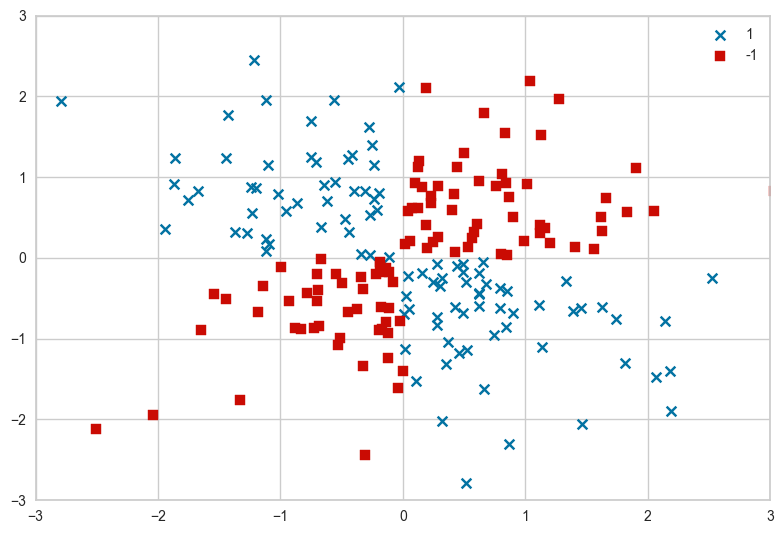

In [47]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(1)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0,
                       X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)

plt.scatter(X_xor[y_xor == 1, 0],
            X_xor[y_xor == 1, 1],
            c='b', marker='x',
            label='1')
plt.scatter(X_xor[y_xor == -1, 0],
            X_xor[y_xor == -1, 1],
            c='r',
            marker='s',
            label='-1')

plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend(loc='best')
plt.tight_layout()
#plt.savefig('images/03_12.png', dpi=300)
plt.show()

## Using the kernel trick to find separating hyperplanes in higher dimensional space

<div class="alert alert-success">
PLAYTIME: Complete the next cell code to classify previous XOR problem using SVM classifier. Which kernel are you using?
</div>


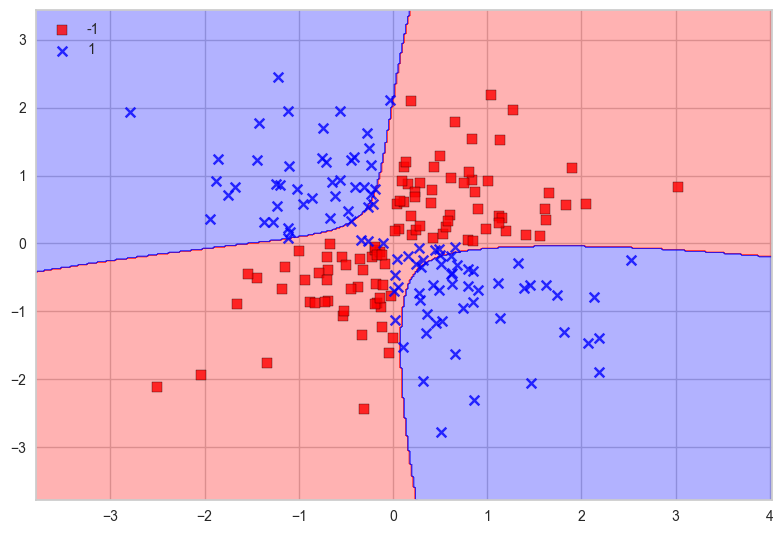

In [48]:
#############
## Fit your code here:


#######

plot_decision_regions(X_xor, y_xor,
                      #classifier=## Fit your classifier here ##)
                    )
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

<div class="alert alert-success">
PLAYTIME: For the petal dataset with standarized training, (1) study the effect of the parameters gamma and C of the radial basis function kernel for SVM. Which is the effect of increasing gamma? and C?
Play with other kernerls.
Write the code in several cells for asking previous questions.
</div>


# Decision tree learning

## Maximizing information gain - getting the most bang for the buck

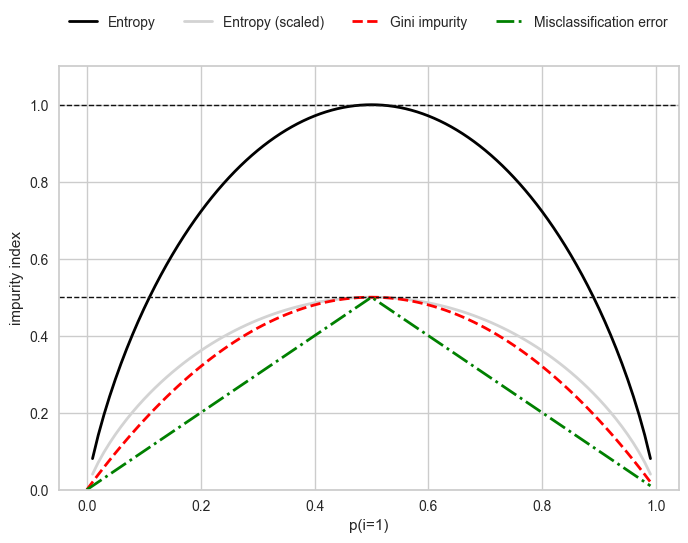

In [51]:
import matplotlib.pyplot as plt
import numpy as np


def gini(p):
    return p * (1 - p) + (1 - p) * (1 - (1 - p))


def entropy(p):
    return - p * np.log2(p) - (1 - p) * np.log2((1 - p))


def error(p):
    return 1 - np.max([p, 1 - p])

x = np.arange(0.0, 1.0, 0.01)

ent = [entropy(p) if p != 0 else None for p in x]
sc_ent = [e * 0.5 if e else None for e in ent]
err = [error(i) for i in x]

fig = plt.figure()
ax = plt.subplot(111)
for i, lab, ls, c, in zip([ent, sc_ent, gini(x), err], 
                          ['Entropy', 'Entropy (scaled)', 
                           'Gini impurity', 'Misclassification error'],
                          ['-', '-', '--', '-.'],
                          ['black', 'lightgray', 'red', 'green', 'cyan']):
    line = ax.plot(x, i, label=lab, linestyle=ls, lw=2, color=c)

ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15),
          ncol=5, fancybox=True, shadow=False)

ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
ax.axhline(y=1.0, linewidth=1, color='k', linestyle='--')
plt.ylim([0, 1.1])
plt.xlabel('p(i=1)')
plt.ylabel('impurity index')
#plt.savefig('images/03_19.png', dpi=300, bbox_inches='tight')
plt.show()

## Building a decision tree

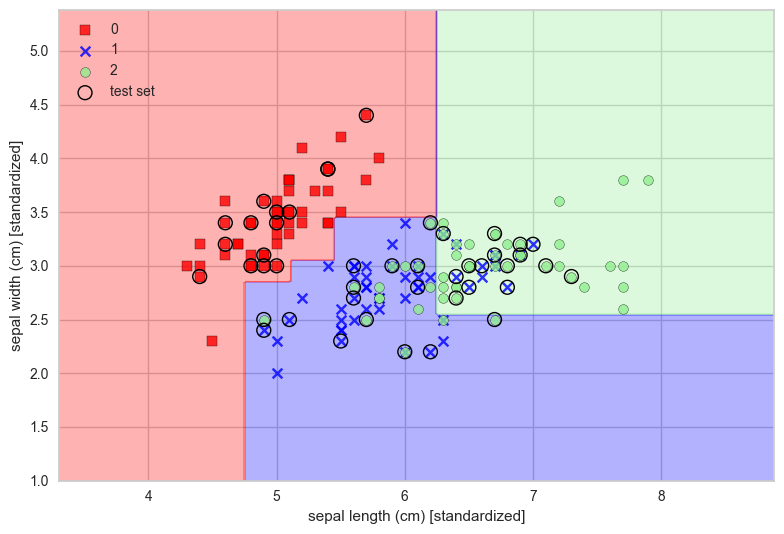

In [52]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(criterion='gini', 
                                    max_depth=4, 
                                    random_state=1)
tree_model.fit(X_train, y_train)
#X = pd.DataFrame(iris.data[:, [2,3]], columns=iris.feature_names[2:4])
#X_combined = pd.DataFrame(np.vstack((X_train, X_test)),columns=X.columns)
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X_combined, y_combined, 
                      classifier=tree_model,
                      test_idx=range(105, 150))

plt.xlabel(col_names[0] + ' [standardized]')
plt.ylabel(col_names[1] + ' [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

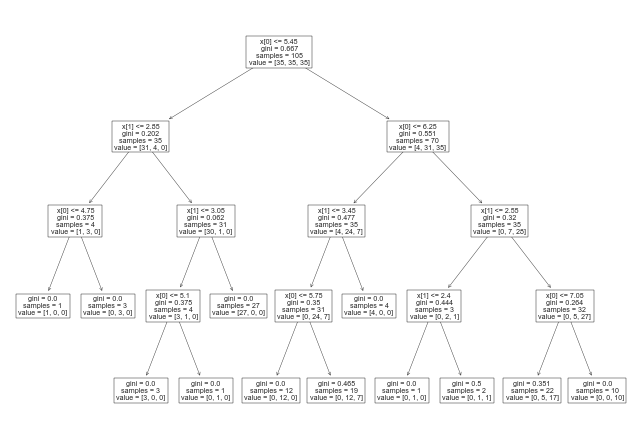

In [53]:
from sklearn import tree

tree.plot_tree(tree_model)
plt.show()

In [54]:
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz

dot_data = export_graphviz(tree_model,
                           filled=True, 
                           rounded=True,
                           class_names=['Setosa', 
                                        'Versicolor',
                                        'Virginica'],
                           feature_names=['petal length', 
                                          'petal width'],
                           out_file=None) 
graph = graph_from_dot_data(dot_data) 
graph.write_png('tree.png') 

True

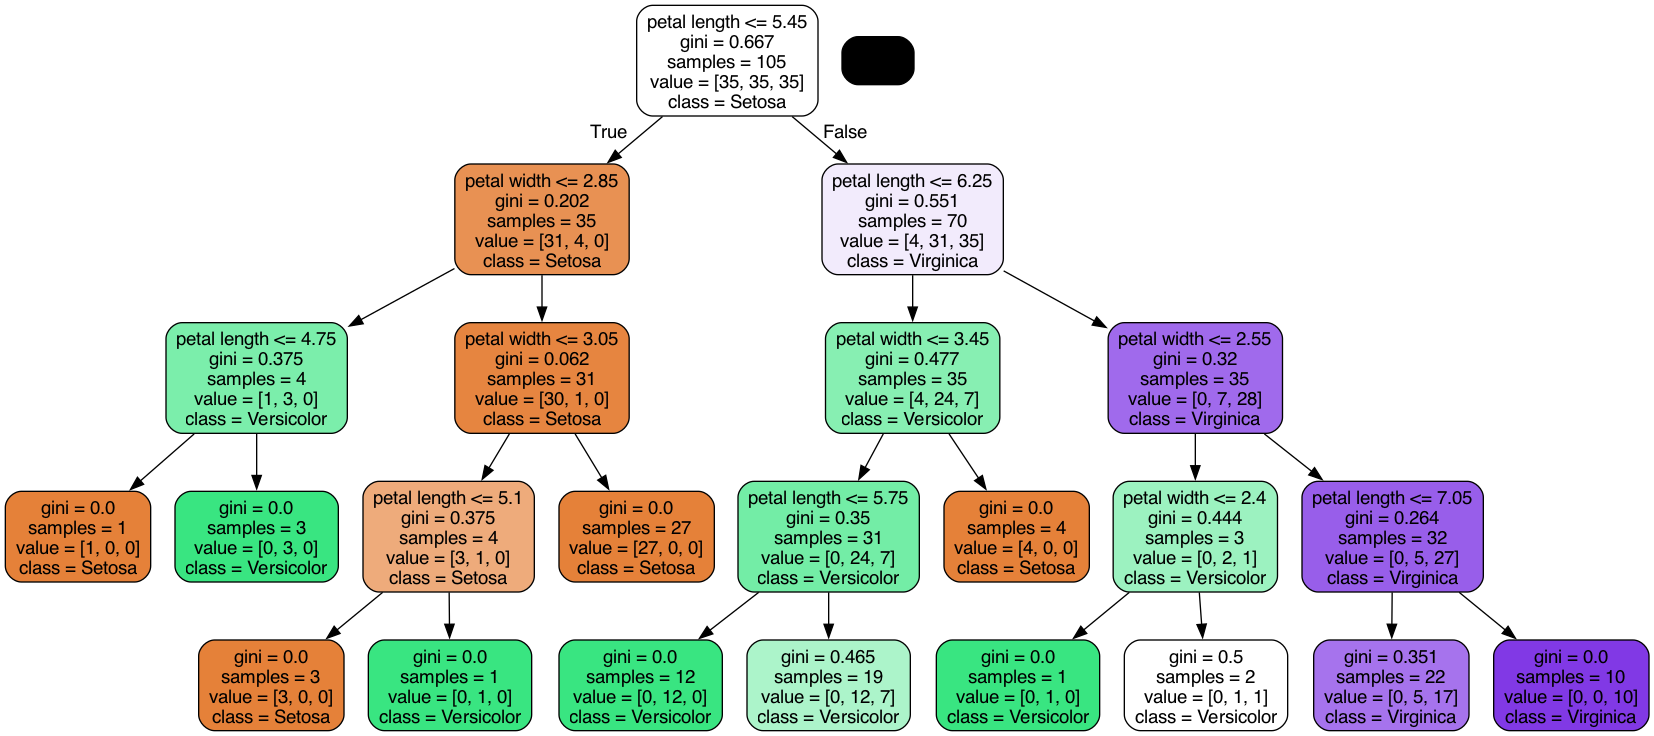

In [55]:
Image(filename='tree.png', width=700) 

In [56]:
import interactive_decision_tree as idt ## module in the repository
X_combined = pd.DataFrame(np.vstack((X_train, X_test)),columns=X.columns)
idt.create_tree(tree_model = tree_model, 
                X = X_combined, 
                target_names=iris.target_names, 
                save_path = "./iris_tree.html")

Saved to ./iris_tree.html


In [57]:
idt.create_sankey(tree_model = tree_model, 
                  X = X_combined, 
                  target_names=iris.target_names, 
                  save_path = "./iris_sankey.html")

Saved to ./iris_sankey.html


In [58]:
tree_model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 4,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 1,
 'splitter': 'best'}

In [ ]:
help(tree_model)

## Pruning trees

Number of nodes in the last tree is: 1 with ccp_alpha: 0.2321088435374153


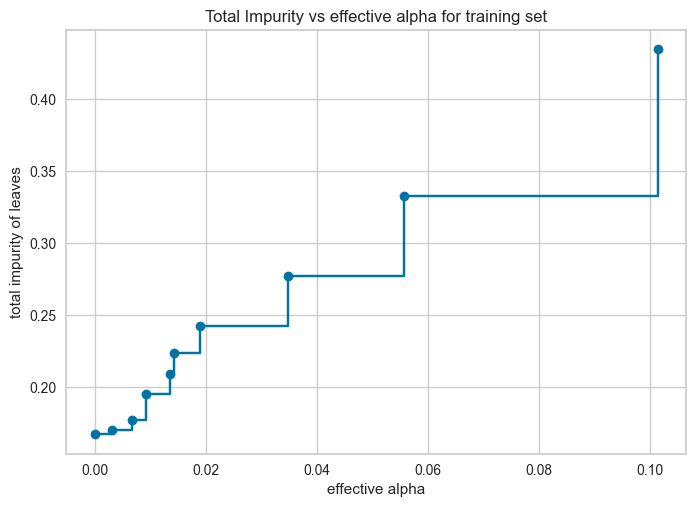

In [60]:
path = tree_model.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

tree_models = []
for ccp_alpha in ccp_alphas:
    tree_model = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    tree_model.fit(X_train, y_train)
    tree_models.append(tree_model)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        tree_models[-1].tree_.node_count, ccp_alphas[-1]
    )
)


<div class="alert alert-success">
PLAYTIME: Play with alpha parameter and plot a graph for Accuracy VS alpha for the Iris dataset. Use the method score() to access the predict method and metrics from the models. You can check the resulting graph in the slides.
</div>

In [86]:
## Write your code here

In [62]:
show_html(pd.DataFrame(test_scores).sort_values(by=0).to_html())
tree_models[3]

,0
10,0.333333
4,0.622222
9,0.622222
2,0.644444
3,0.644444
5,0.644444
8,0.644444
0,0.666667
1,0.666667
7,0.666667


DecisionTreeClassifier(ccp_alpha=0.009216589861751147, random_state=0)

In [63]:
print(classification_report(tree_models[3].predict(X_test), y_test, target_names=iris.target_names))
results_df = save_results(tree_models[3], X_test, y_test, 'Decision Tree', results_df)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.53      0.47      0.50        17
   virginica       0.40      0.46      0.43        13

    accuracy                           0.64        45
   macro avg       0.64      0.64      0.64        45
weighted avg       0.65      0.64      0.65        45



In [64]:
results_df

,test acc,precision score (W),recall score (W),f1 score (W)
Perceptron,0.688889,0.728395,0.688889,0.629630
Logistic Regression,0.755556,0.759259,0.755556,0.753086
Logistic Regression GridSearch,0.755556,0.759259,0.755556,0.753086
SVM,0.733333,0.734540,0.733333,0.732143
Decision Tree,0.644444,0.644042,0.644444,0.642857


In [65]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

#iris = datasets.load_iris()
#X, y = iris.data[85:, [0,2]], iris.target[85:]
#le = LabelEncoder()
#y = le.fit_transform(y)


from sklearn.model_selection import GridSearchCV

params = {'max_depth': [1, 2, 3, 4, 5],
          'ccp_alpha': [0, 0.001, 0.1, 0.15, 0.20, 0.30],
          'criterion': ["gini", "entropy", "log_loss"]} ## HERE
grid = GridSearchCV(tree_models[3],
                    param_grid=params,
                    cv=10,
                    n_jobs=-1,
                    #iid=False,
                    refit=True,
                    )
grid.fit(X_train, y_train)

for r, _ in enumerate(grid.cv_results_['mean_test_score']):
    print("%0.3f +/- %0.2f %r"
          % (grid.cv_results_['mean_test_score'][r], 
             grid.cv_results_['std_test_score'][r] / 2.0, 
             grid.cv_results_['params'][r]))

0.631 +/- 0.04 {'ccp_alpha': 0, 'criterion': 'gini', 'max_depth': 1}
0.784 +/- 0.08 {'ccp_alpha': 0, 'criterion': 'gini', 'max_depth': 2}
0.793 +/- 0.06 {'ccp_alpha': 0, 'criterion': 'gini', 'max_depth': 3}
0.773 +/- 0.06 {'ccp_alpha': 0, 'criterion': 'gini', 'max_depth': 4}
0.746 +/- 0.08 {'ccp_alpha': 0, 'criterion': 'gini', 'max_depth': 5}
0.631 +/- 0.04 {'ccp_alpha': 0, 'criterion': 'entropy', 'max_depth': 1}
0.736 +/- 0.09 {'ccp_alpha': 0, 'criterion': 'entropy', 'max_depth': 2}
0.783 +/- 0.06 {'ccp_alpha': 0, 'criterion': 'entropy', 'max_depth': 3}
0.782 +/- 0.07 {'ccp_alpha': 0, 'criterion': 'entropy', 'max_depth': 4}
0.802 +/- 0.07 {'ccp_alpha': 0, 'criterion': 'entropy', 'max_depth': 5}
0.631 +/- 0.04 {'ccp_alpha': 0, 'criterion': 'log_loss', 'max_depth': 1}
0.736 +/- 0.09 {'ccp_alpha': 0, 'criterion': 'log_loss', 'max_depth': 2}
0.783 +/- 0.06 {'ccp_alpha': 0, 'criterion': 'log_loss', 'max_depth': 3}
0.782 +/- 0.07 {'ccp_alpha': 0, 'criterion': 'log_loss', 'max_depth': 4}
0.8

In [66]:
grid.best_estimator_

DecisionTreeClassifier(ccp_alpha=0, criterion='entropy', max_depth=5,
                       random_state=0)

<div class="alert alert-success">
PLAYTIME: Study the performance of LogisticRegression and SVM using the GridSearchCV algorithm. Repeat the study as in the previous PLAYTIME: for the petal dataset with standarized training.
</div>

In [67]:
grid.best_estimator_.feature_importances_

array([0.69584504, 0.30415496])

In [68]:
show_html(pd.DataFrame(grid.cv_results_).loc[:,['params', 'mean_test_score','rank_test_score']].sort_values(by='rank_test_score').head().to_html())

,params,mean_test_score,rank_test_score
14,"{'ccp_alpha': 0, 'criterion': 'log_loss', 'max_depth': 5}",0.801818,1
29,"{'ccp_alpha': 0.001, 'criterion': 'log_loss', 'max_depth': 5}",0.801818,1
24,"{'ccp_alpha': 0.001, 'criterion': 'entropy', 'max_depth': 5}",0.801818,1
9,"{'ccp_alpha': 0, 'criterion': 'entropy', 'max_depth': 5}",0.801818,1
2,"{'ccp_alpha': 0, 'criterion': 'gini', 'max_depth': 3}",0.792727,5


In [69]:
print(classification_report(grid.predict(X_test), y_test, target_names=iris.target_names))
results_df = save_results(grid, X_test, y_test, 'Decision Tree GridSearch', results_df)

              precision    recall  f1-score   support

      setosa       0.93      0.88      0.90        16
  versicolor       0.40      0.50      0.44        12
   virginica       0.60      0.53      0.56        17

    accuracy                           0.64        45
   macro avg       0.64      0.63      0.64        45
weighted avg       0.67      0.64      0.65        45



In [70]:
results_df

,test acc,precision score (W),recall score (W),f1 score (W)
Perceptron,0.688889,0.728395,0.688889,0.629630
Logistic Regression,0.755556,0.759259,0.755556,0.753086
Logistic Regression GridSearch,0.755556,0.759259,0.755556,0.753086
SVM,0.733333,0.734540,0.733333,0.732143
Decision Tree,0.644444,0.644042,0.644444,0.642857
Decision Tree GridSearch,0.644444,0.634804,0.644444,0.636723


# K-nearest neighbors - a lazy learning algorithm

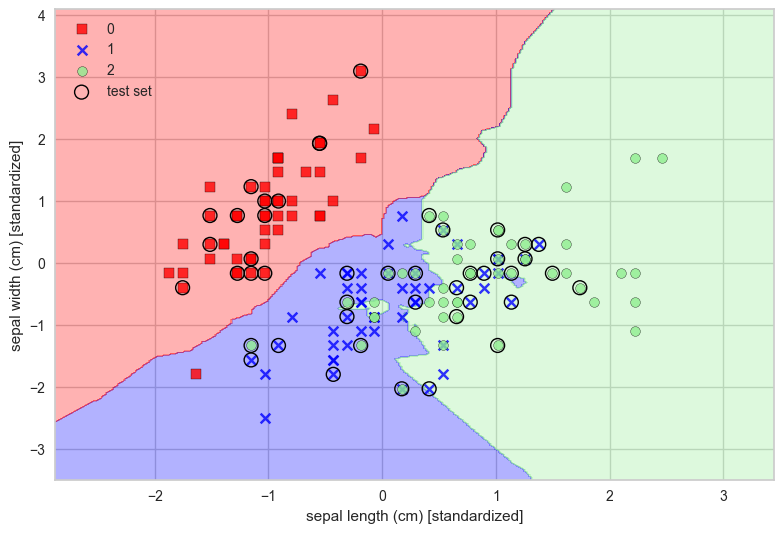

In [71]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, 
                           p=2, 
                           metric='minkowski')
knn.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined, 
                      classifier=knn, test_idx=range(105, 150))

plt.xlabel(col_names[0] + ' [standardized]')
plt.ylabel(col_names[1] + ' [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()

plt.show()

In [72]:
print(classification_report(knn.predict(X_test_std), y_test, target_names=iris.target_names))
results_df = save_results(knn, X_test_std, y_test, 'KNN', results_df)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.47      0.58      0.52        12
   virginica       0.67      0.56      0.61        18

    accuracy                           0.71        45
   macro avg       0.71      0.71      0.71        45
weighted avg       0.72      0.71      0.71        45



In [73]:
results_df

,test acc,precision score (W),recall score (W),f1 score (W)
Perceptron,0.688889,0.728395,0.688889,0.629630
Logistic Regression,0.755556,0.759259,0.755556,0.753086
Logistic Regression GridSearch,0.755556,0.759259,0.755556,0.753086
SVM,0.733333,0.734540,0.733333,0.732143
Decision Tree,0.644444,0.644042,0.644444,0.642857
Decision Tree GridSearch,0.644444,0.634804,0.644444,0.636723
KNN,0.711111,0.712963,0.711111,0.708193


<div class="alert alert-success">
PLAYTIME: Play with the number of k-neighbors and the metric. Perform a grid-search varying such parameters.
</div>



# Bonus track: Linear Discriminant Analysis for classification

LDA models the probability $p(y=C_k|X=x)$, it assumes:
* $p(x|C_k)$ is Gaussian
* All covariance matrices are the same ($\Sigma_k = \Sigma$)

$\quad \quad \quad \quad a_k(x) = x^T\Sigma^{-1}\mu_k - \frac{1}{2}\mu_k^T\Sigma^{-1}\mu_k + log(\pi_k)$

$\pi_k$ prior probability per class.

where:

$w = \Sigma^{-1}\mu_k$

$w_0=- \frac{1}{2}\mu_k^T\Sigma^{-1}\mu_k + log(\pi_k)$



In [74]:
lda = LinearDiscriminantAnalysis()
print(np.mean(cross_val_score(lda,X_train,y_train,cv=10)))

0.8400000000000001


Priors: [0.33333333 0.33333333 0.33333333]
Means:

          0         1
0  5.022857  3.434286
1  5.871429  2.780000
2  6.677143  2.994286
Intercepts:
Explained Variance Ratio
Coefs:


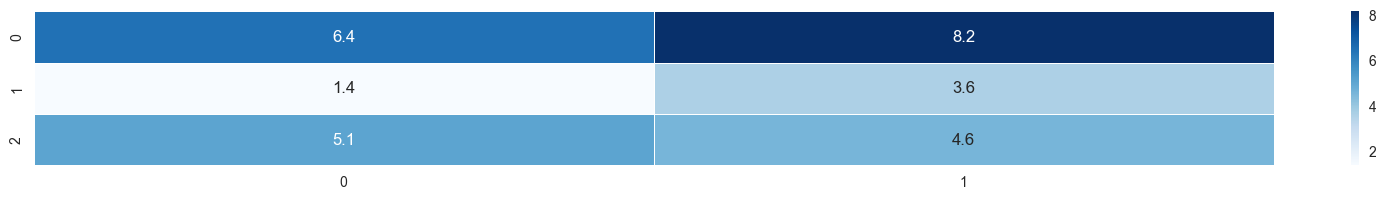

In [75]:
lda_model = LinearDiscriminantAnalysis().fit(X_train, y_train)

print('Priors:', lda_model.priors_)
print('Means:\n')
means =pd.DataFrame(lda_model.means_)
#means.columns=X.columns
print(means)

print('Intercepts:')
intercepts = pd.DataFrame(lda_model.intercept_)
intercepts

print('Explained Variance Ratio')
pd.DataFrame(lda_model.explained_variance_ratio_ )

print('Coefs:')
coefs = pd.DataFrame(lda_model.coef_)
#coefs.columns = X.columns
# coefs.T

plt.figure(figsize=(20,2));
sns.heatmap(coefs.abs(),annot=True, linewidths=.5,cbar=True,xticklabels=True, cmap='Blues', annot_kws={'size':12});

In [76]:
print(classification_report(lda_model.predict(X_test), y_test, target_names=iris.target_names))
results_df = save_results(lda_model, X_test, y_test, 'LDA', results_df)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.53      0.57      0.55        14
   virginica       0.60      0.56      0.58        16

    accuracy                           0.71        45
   macro avg       0.71      0.71      0.71        45
weighted avg       0.71      0.71      0.71        45



**macro avg** stands for the average of all results from all classes, **weighted average** weights with regards the class ratio.

In [77]:
results_df

,test acc,precision score (W),recall score (W),f1 score (W)
Perceptron,0.688889,0.728395,0.688889,0.629630
Logistic Regression,0.755556,0.759259,0.755556,0.753086
Logistic Regression GridSearch,0.755556,0.759259,0.755556,0.753086
SVM,0.733333,0.734540,0.733333,0.732143
Decision Tree,0.644444,0.644042,0.644444,0.642857
Decision Tree GridSearch,0.644444,0.634804,0.644444,0.636723
KNN,0.711111,0.712963,0.711111,0.708193
LDA,0.711111,0.711310,0.711111,0.710790


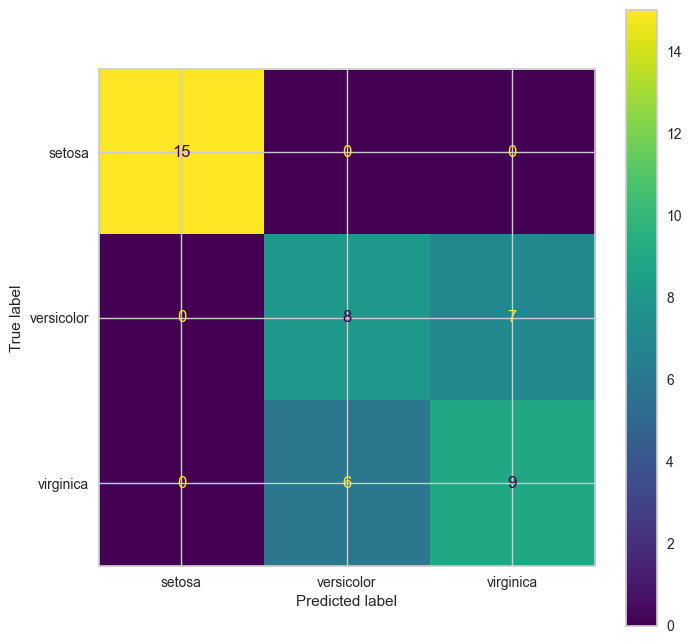

In [78]:
plt.figure(figsize=(8,8));
ConfusionMatrixDisplay.from_estimator(lda_model, X_test,y_test, display_labels=iris.target_names, ax=plt.subplot());

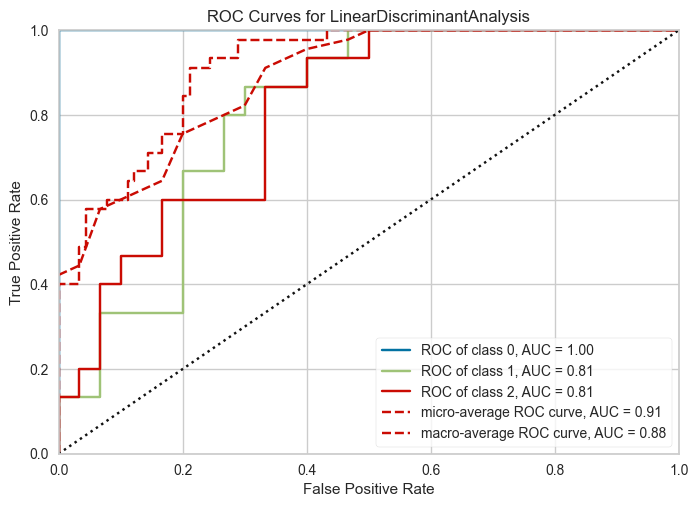

In [79]:
from yellowbrick.classifier.rocauc import roc_auc
#plt.figure(figsize=(8,8));
roc_auc(lda_model, X_test,y_test, ax=plt.subplot());

In [80]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

iris = datasets.load_iris()
X, y = iris.data[95:,[0,1]], iris.target[95:]
le = LabelEncoder()
y = le.fit_transform(y)

X_train2, X_test2, y_train2, y_test2 =\
       train_test_split(X, y, 
                        test_size=0.3, 
                        random_state=1,
                        stratify=y)

# Using a pipeline

<div class="alert alert-success">
PLAYTIME: Complete the next cell code to include LDA classifier. Complete the cross-validation with a Gridsearch using some hyperparameter search with a params list (at least using two parameters) depending on the classifier. Prepare a function to obtain similar results than the ones obtained over the **test_set** in the previous cells by each classifier. Then, you can apply the function to a new dataset as the breast cancer to quickly study the results of your classifiers.
</div>

In [81]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

clf1 = LogisticRegression(penalty='l2', 
                          C=0.001,
                          solver='lbfgs',
                          random_state=1)

clf2 = DecisionTreeClassifier(max_depth=1,
                              criterion='entropy',
                              random_state=0)

clf3 = KNeighborsClassifier(n_neighbors=1,
                            p=2,
                            metric='minkowski')

clf4 = SVC(kernel='linear',
            C=1.0, 
            random_state=1, probability=True)

pipe1 = Pipeline([['sc', StandardScaler()],
                  ['clf', clf1]])
pipe3 = Pipeline([['sc', StandardScaler()],
                  ['clf', clf3]])

pipe4 = Pipeline([['sc', StandardScaler()],
                  ['clf', clf4]])


clf_labels = ['Logistic regression', 'Decision tree', 'KNN', 'SVM']

print('10-fold cross validation:\n')
for clf, label in zip([pipe1, clf2, pipe3, pipe4], clf_labels):
    scores = cross_val_score(estimator=clf,
                             X=X_train2,
                             y=y_train2,
                             cv=10,
                             #scoring='roc_auc'
                             )
    print("ROC AUC: %0.2f (+/- %0.2f) [%s]"
          % (scores.mean(), scores.std(), label))

10-fold cross validation:

ROC AUC: 0.93 (+/- 0.11) [Logistic regression]
ROC AUC: 0.87 (+/- 0.14) [Decision tree]
ROC AUC: 0.87 (+/- 0.14) [KNN]
ROC AUC: 0.93 (+/- 0.11) [SVM]


# Homework

I recommend to study the next dataset to understand the concepts from theory class and practice for the lab report.

In [82]:
from sklearn.datasets import load_breast_cancer

In [83]:
X, y =  load_breast_cancer(return_X_y=True, as_frame=True)

X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [84]:
y.value_counts()

target
1    357
0    212
Name: count, dtype: int64

Class 0 corresponds to a positive cancer diagnosis and class 1 to a false diagnosis.

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1, stratify=y)

<div class="alert alert-success">
PLAYTIME: Study the breast cancer dataset. Visualize the variables' distribution and their correlations. Plot ROC curves for the binary problem, what is the operational point you would setup for this problem? Model the data with all previous classifiers and decide on the best model fitting. Use cross-validation and grid-search to hyperameter tunning. This new dataset has a high dimensionality, which classifiers will benefit from a dimensionality reduction as a pre-processing step? Compare results using PCA.
</div>